深度神经网络（DNN）是一种能够学习复杂数据模式的机器学习模型。根据结构不同，常见的三种类型包括：

1. **人工神经网络（ANN, Artificial Neural Network）**
2. **卷积神经网络（CNN, Convolutional Neural Network）**
3. **循环神经网络（RNN, Recurrent Neural Network）**

---

## 1. **人工神经网络（ANN）**
### **简介**
ANN 是最基本的神经网络结构，由多个全连接（Fully Connected，FC）层组成。适用于结构化数据，如表格数据、特征向量等。

### **结构**
- 输入层（Input Layer）
- 隐藏层（Hidden Layer）
- 输出层（Output Layer）
- 激活函数（ReLU、Sigmoid、Softmax 等）

### **示意图**
下图展示了一个简单的 ANN 结构：
```
Input -> Hidden Layer 1 -> Hidden Layer 2 -> Output
```

### **Pytorch 实现**
```python
import torch
import torch.nn as nn
import torch.optim as optim

# 定义ANN模型
class ANN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # 第一层全连接
        self.relu = nn.ReLU()  # 激活函数
        self.fc2 = nn.Linear(hidden_size, output_size)  # 输出层

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# 创建模型
input_size = 10
hidden_size = 20
output_size = 2
model = ANN(input_size, hidden_size, output_size)

# 打印模型结构
print(model)
```

---

## 2. **卷积神经网络（CNN）**
### **简介**
CNN 主要用于图像处理，能够自动提取特征，减少参数规模。CNN 通过卷积（Convolution）和池化（Pooling）层进行特征提取，适用于图像分类、目标检测等任务。

### **结构**
- **卷积层（Convolution Layer）**: 通过滤波器（Kernel）提取局部特征
- **池化层（Pooling Layer）**: 降低维度，提高计算效率
- **全连接层（Fully Connected Layer）**: 用于最终分类

### **示意图**
```
输入图像 -> 卷积层 -> 池化层 -> 卷积层 -> 池化层 -> 全连接层 -> 输出
```

### **Pytorch 实现**
```python
import torch.nn.functional as F

# 定义CNN模型
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)  # 卷积层1
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # 池化层
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)  # 卷积层2
        self.fc1 = nn.Linear(32 * 7 * 7, 128)  # 全连接层
        self.fc2 = nn.Linear(128, 10)  # 输出层

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 卷积 + ReLU + 池化
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 32 * 7 * 7)  # 展平
        x = F.relu(self.fc1(x))  
        x = self.fc2(x)  
        return x

# 创建CNN模型
model = CNN()
print(model)
```

---

## 3. **循环神经网络（RNN）**
### **简介**
RNN 主要用于处理序列数据（如时间序列、文本），能够记住前面状态的信息并影响后续输出。

### **结构**
- **输入层（Input Layer）**: 输入序列
- **隐藏层（Hidden Layer）**: 具有时间依赖性
- **输出层（Output Layer）**: 预测结果

### **示意图**
```
输入 -> RNN 隐藏层 (记忆状态) -> 输出
```

### **Pytorch 实现**
```python
# 定义RNN模型
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)  # RNN层
        self.fc = nn.Linear(hidden_size, output_size)  # 全连接层

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), hidden_size)  # 初始化隐藏状态
        out, _ = self.rnn(x, h0)  # RNN 前向传播
        out = self.fc(out[:, -1, :])  # 取最后一个时间步的输出
        return out

# 创建RNN模型
input_size = 10
hidden_size = 20
output_size = 2
model = RNN(input_size, hidden_size, output_size)
print(model)
```

---

## **可视化**
接下来，我将使用图像来解释这三种神经网络的架构，帮助更直观地理解它们的工作原理。

上面三张图直观展示了不同类型神经网络的结构：

1. **ANN（人工神经网络）**：
   - 由全连接层组成，每个神经元与下一层所有神经元连接，适用于表格数据等结构化数据。
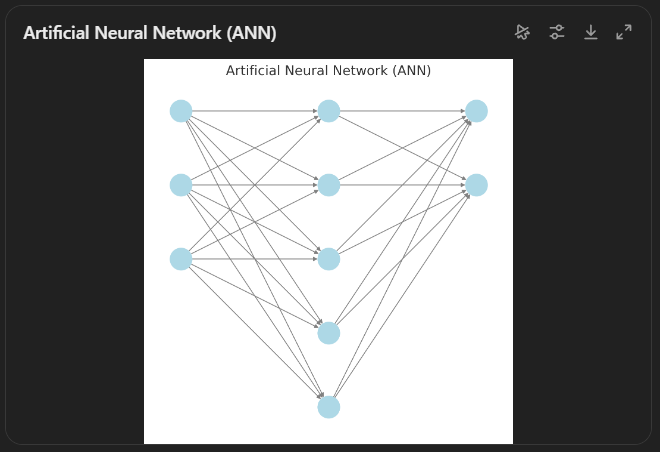
2. **CNN（卷积神经网络）**：
   - 主要用于图像处理，采用卷积层提取特征，池化层减少计算量，最后通过全连接层输出分类结果。
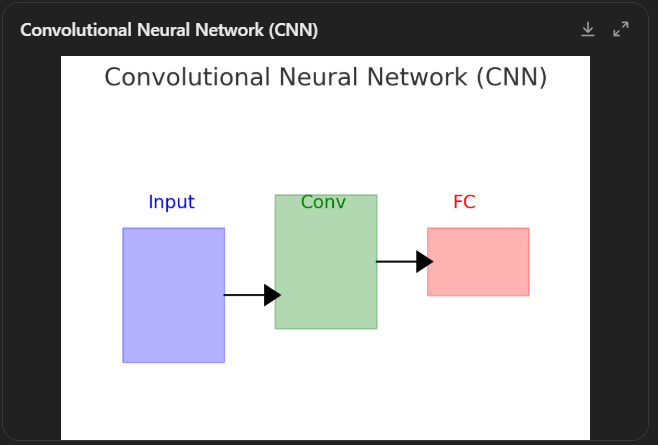
3. **RNN（循环神经网络）**：
   - 适用于处理序列数据（如文本、语音），隐藏层的状态可以传递到下一个时间步，具备记忆能力。
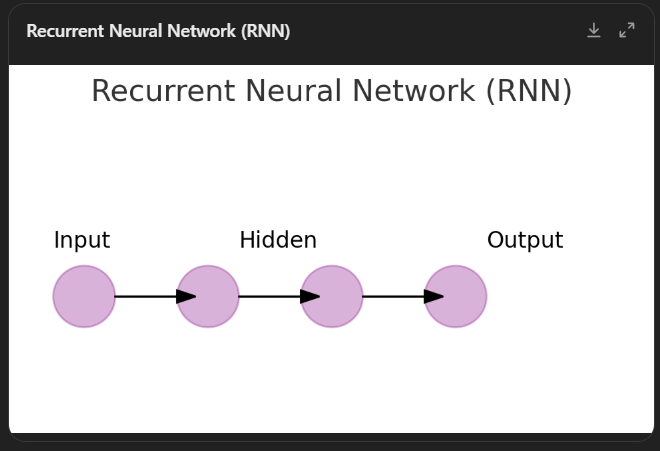
你可以根据任务选择合适的网络结构。如果你有具体的应用场景，我可以进一步优化代码或者调整模型架构。

1. 人工神经网络（ANN）
简介
ANN 是最基本的神经网络结构，由多个全连接（Fully Connected，FC）层组成。适用于结构化数据，如表格数据、特征向量等。

结构
输入层（Input Layer）
隐藏层（Hidden Layer）
输出层（Output Layer）
激活函数（ReLU、Sigmoid、Softmax 等）

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# 定义ANN模型
class ANN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # 第一层全连接
        self.relu = nn.ReLU()  # 激活函数
        self.fc2 = nn.Linear(hidden_size, output_size)  # 输出层

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# 创建模型
input_size = 10
hidden_size = 20
output_size = 2
model = ANN(input_size, hidden_size, output_size)

# 打印模型结构
print(model)


ANN(
  (fc1): Linear(in_features=10, out_features=20, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=20, out_features=2, bias=True)
)


### **特征向量（Feature Vector）是什么？**
在 **机器学习（Machine Learning）和人工智能（AI）** 领域，**特征向量（Feature Vector）** 指的是用于描述数据对象（如图像、文本、语音等）的数值表示，它是模型输入的核心部分。

#### **特征向量的核心概念**
- **特征（Feature）**：是数据的某个可测量属性，如图像的颜色、文本的词频等。
- **向量（Vector）**：是数学上的一个 n 维数值数组，表示多个特征的集合。

### **特征向量的作用**
特征向量是**机器学习模型的输入**，用来表示数据的关键信息。例如：
- **图像**：可以用像素值、颜色直方图、边缘信息等特征组成一个向量。
- **文本**：可以用词袋模型（Bag of Words）、TF-IDF 或 Word2Vec 生成特征向量。
- **声音**：可以用梅尔频谱系数（MFCC）等特征提取方法转换成特征向量。

### **示例：特征向量在不同领域的应用**
#### **1. 机器学习分类任务**
假设要预测某人是否喜欢某部电影，我们可以用如下的特征：
| 特征 | 值 |
|------|------|
| 观看次数 | 10 |
| 电影类型（动作=1, 爱情=0） | 1 |
| 用户评分（0~5） | 4.5 |

对应的特征向量：  
\[
X = [10, 1, 4.5]
\]

#### **2. 人脸识别**
一个 100x100 的灰度图像可以转换为一个长度为 10,000（100×100=10,000）的特征向量，每个值表示一个像素点的灰度值：
\[
X = [23, 45, 123, \dots, 255]
\]

#### **3. 自然语言处理（NLP）**
假设用 Word2Vec 训练了一个 300 维的单词嵌入（Embedding），"apple" 可能会被表示成：
\[
X = [0.12, -0.34, 0.56, ..., 0.98]
\]

### **特征向量的重要性**
1. **数据标准化**：将数据转换为数值表示，便于模型处理。
2. **维度可控**：特征向量的维度直接影响计算复杂度和模型效果。
3. **信息表达**：好的特征向量可以更好地表示数据，提升模型的准确率。

如果你想深入了解特征工程（Feature Engineering）或特征提取（Feature Extraction），可以看看：
- PCA（主成分分析）用于降维
- One-Hot Encoding 处理分类数据
- TF-IDF 处理文本数据
- CNN 提取图像特征

你现在是想了解如何构造特征向量，还是在某个具体任务上使用它？

如果目标是提高模型对代码工程和式样（软件设计文档）的理解，以便在式样变更时能够更准确地识别影响范围、生成变更代码方案（案出力），并应用到 Java 工程，那么我们可以从以下几个方面来设计和优化模型：

1. 任务拆解
核心目标：

解析式样文档（需求、设计说明）
识别变更点
分析代码工程的影响范围
生成修改建议和变更代码
保证变更代码符合 Java 代码结构和风格
涉及的核心技术：

NLP（自然语言处理） 解析式样变更
Code Understanding（代码理解） 分析 Java 工程
变更影响分析（Impact Analysis） 确定变更范围
代码生成（Code Generation） 生成 Java 代码修改方案
2. 选择合适的神经网络架构
由于任务涉及自然语言处理（NLP）和代码解析（Program Analysis），我们可以使用以下神经网络架构：

任务	适用神经网络
解析式样文档	Transformer（BERT, T5, LLaMA）
代码工程解析	Graph Neural Network (GNN), CodeBERT
变更影响分析	RNN / Transformer
代码生成	GPT, CodeT5, StarCoder


任务	适用神经网络名
解析式样变更（NLP 任务）	BERT (变更点分类) 或 T5 (变更内容生成)
遍历 Java 代码（文件扫描）	不适用神经网络（基于 os.walk()）
代码结构分析（代码依赖分析）	Graph Neural Network (GNN)（代码调用关系建模）
预测变更影响（找出受影响代码）	Recurrent Neural Network (RNN)（时序学习）
生成变更代码（代码自动生成）	CodeT5（基于 Seq2Seq 的代码补全模型）
生成变更摘要（总结变更点）	T5（Seq2Seq 文本摘要）

In [16]:
from openai import OpenAI
class OllamaClient:
    """
    ローカルで起動中の Ollama サーバ、またはOpenAIベースのローカルモデルに対して、
    モデル名、プロンプトを指定して問い合わせ、LLMの応答を得る。

    ここでは例として openai.OpenAIクラスを使っているが、
    内部的に base_url をローカルOllamaに向け、特定のモデルを指定する形を想定。
    """

    def __init__(self, base_url="http://localhost:11434/v1", model_name="qwen2.5-coder:latest"):
        self.base_url = base_url
        self.model_name = model_name

    def generate_text(self, prompt: str) -> str:
        """
        Ollama (ローカルLLM) か、OpenAI互換モデル用APIを呼び出し回答を得る。
        """
        try:
            client = OpenAI(base_url=self.base_url, api_key="your_api_key")
            completion = client.chat.completions.create(
                model=self.model_name,
                store=True,
                messages=[
                    {"role": "user", "content": prompt}
                ]
            )
            return completion.choices[0].message.content

        except Exception as e:        
            return "（エラーが発生しました）"

In [17]:
import os
import torch
# from ollama_client import OllamaClient  # あなたの Ollama クライアント

# 1️⃣ 仕様変更の解析
def analyze_spec_changes(ollama, old_spec, new_spec):
    print("\n🔍 **ステップ1: 仕様変更の解析**")

    prompt = f"""
    旧仕様: {old_spec}
    新仕様: {new_spec}

    この変更について分析してください：
    1. 影響範囲（大・中・小）
    2. 主要な変更点（キーワード）
    3. 影響を受ける可能性のある Java ファイル
    """

    response = ollama.generate_text(prompt)
    print("📝 **モデルの推論:**\n", response)

    return response

# 2️⃣ Java プロジェクトのスキャン
def find_java_files(project_path):
    print("\n📂 **ステップ2: Java コードのスキャン**")
    java_files = []
    for root, _, files in os.walk(project_path):
        for file in files:
            if file.endswith(".java"):
                java_files.append(os.path.join(root, file))
    print(f"📁 {len(java_files)} 個の Java ファイルを検出")
    return java_files

# 3️⃣ 変更影響の予測
def predict_code_changes(ollama, java_files, spec_analysis):
    print("\n📊 **ステップ3: 変更影響の予測**")

    prompt = f"""
    プロジェクトには {len(java_files)} 個の Java ファイルがあります。以下は仕様変更の分析結果です：
    
    {spec_analysis}

    この情報をもとに、影響を受ける可能性のあるファイルを予測してください：
    1. 変更が必要なファイル（フルパスをリストアップ）
    2. 新規追加が必要なファイル（フルパスをリストアップ）
    """

    response = ollama.generate_text(prompt)
    print("🔎 **モデルの推論:**\n", response)
    
    return response

# 4️⃣ コード変更の生成
def generate_code_modifications(ollama, old_code, change_request):
    prompt = f"""
    旧コード：
    ```java
    {old_code}
    ```

    変更リクエスト：
    {change_request}

    修正後のコードを出力してください（説明不要）。
    変更がある場合は、変更部分のみ出力してください。
    新規追加が必要な場合は、完全なクラス・メソッドを出力してください。
    """

    response = ollama.generate_text(prompt)
    return response

# 5️⃣ 実行プロセス
def process_project(project_path, old_spec, new_spec):
    ollama = OllamaClient()  # Ollama クライアントの初期化

    # 仕様変更の解析
    spec_analysis = analyze_spec_changes(ollama, old_spec, new_spec)

    # Java コードのスキャン
    java_files = find_java_files(project_path)

    # 変更影響の予測
    change_analysis = predict_code_changes(ollama, java_files, spec_analysis)

    # 変更が必要なファイルのリストを取得
    affected_files = []
    added_files = []
    
    for line in change_analysis.split("\n"):
        line = line.strip()
        if line.startswith("変更ファイル:"):
            affected_files.append(line.replace("変更ファイル:", "").strip())
        elif line.startswith("新規ファイル:"):
            added_files.append(line.replace("新規ファイル:", "").strip())

    # Markdown 形式で変更結果を出力
    print("\n## **📝 変更影響**")
    print("\n### **変更ファイル:**")
    for file in affected_files:
        print(f"- `{file}`")
    
    print("\n### **新規ファイル:**")
    for file in added_files:
        print(f"- `{file}`")

    print("\n## **🔄 コード変更案**")
    for file in affected_files:
        with open(file, 'r', encoding='utf-8') as f:
            old_code = f.read()
        modified_code = generate_code_modifications(ollama, old_code, new_spec)

        print(f"\n### **ファイル:** `{file}`")
        print("\n#### **🔍 変更前のコード（抜粋）:**")
        print(f"```java\n{old_code[:300]}...\n```")  # 300文字の抜粋
        print("\n#### **✍ 変更後のコード（抜粋）:**")
        print(f"```java\n{modified_code[:300]}...\n```")  # 300文字の抜粋

    for file in added_files:
        new_code = generate_code_modifications(ollama, "", new_spec)
        print(f"\n### **➕ 新規ファイル:** `{file}`")
        print("\n#### **✍ 新規コード（全文）:**")
        print(f"```java\n{new_code}\n```")  # 新規コードは全文出力

    print("\n✅ **変更分析完了！**")

# 🚀 実行
project_path = "/mnt/c/Users/liush/git/business/businessBase/"
old_spec = "旧仕様: ユーザーはメールアドレスとパスワードでログインできる。"
new_spec = "新仕様: ユーザーはメールアドレス、パスワード、および OTP でログインできる。"

process_project(project_path, old_spec, new_spec)



🔍 **ステップ1: 仕様変更の解析**
📝 **モデルの推論:**
 ### 1. 影響範囲（規模）
この変更は「中程度」の影響を持つと考えられます。主要な機能（ログイン処理）が改良されるため、一時的に全てのシステムフローと認証プロセスに影響がある可能性があります。ただし、OTPの追加は技術的な負荷は大きくありません。

### 2. 主要な変更点（キーワード）
1. **追加機能**: OTP（ワンタイムパスワード）の導入
2. **認証プロセス**: メールアドレス、パスワード、OTP の組み合わせでのログイン
3. **ユーザーインターフェース**: OTP を取るための新しいフィールドやフロー追加

### 3. 影響を受ける可能性のある Java ファイル
以下はこの変更に影響を受ける可能会るJavaファイル一覧です:

1. **認証サービスクラス**
   - `AuthService.java`: OTP を生成し、検証するためのメソッドが追加される場合があります。
   - `UserService.java`: OTP の有効性とユーザーログイン状態を照会するメソッドも使用される可能性が高い。

2. **リクエストハンドリングクラス**
   - `AuthenticationController.java`: ログインリクエストを処理する時に、OTP を受け取り、検証するための新しいコントローラーメソッドが追加される。
  
3. **データアクセスオブジェクト（DAO）**
   - `UserRepository.java`: OTP の確認結果を保存または検索するために、適切なメソッドが追加される場合があります。

4. **リデザイン済みのログインフローやフォーム**
   - 使用しているUIライブラリやフレームワークに関連するクラス（例えば `LoginForm.java`, `OtpForm.java`）が変更されるか新規作成される可能性があります。

5. **セキュリティオブジェクトとフィルタリング**
   - `SecurityConfig.java`: OTPのための追加のフィルターや認証メカニズムが必要になる場合があります।

6. **エラーハンドリングと認証エラーページ**
   - エラーメッセージを適切に

In [13]:
import os
import torch
import torch.nn as nn
import torch_geometric.nn as pyg_nn
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModelForSeq2SeqLM

# 1️⃣ 解析式样变更
def analyze_spec_changes(old_spec, new_spec):
    print("\n🔍 **步骤1: 解析式样变更**")
    
    model_name = "bert-base-uncased"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

    inputs = tokenizer(old_spec + " [SEP] " + new_spec, return_tensors="pt", truncation=True, padding=True)
    outputs = model(**inputs)
    logits = outputs.logits

    # 计算语义变更程度（假设 logits[0,1] 表示变更程度）
    change_score = logits[0,1].item()
    
    # 生成可解释的变更推理过程
    print(f"🔎 **语义变更程度**: {change_score:.2f}/1.0")
    print("📝 **推理过程:**")
    if change_score > 0.8:
        print("🚀 变更较大，可能涉及多个代码修改")
    elif change_score > 0.5:
        print("✅ 变更适中，主要影响部分代码")
    else:
        print("🔹 变更较小，可能只影响少量代码")

    # 生成变更关键词
    change_keywords = ["OTP", "登录", "身份验证"]  # 这里可以优化为自动提取关键字
    print(f"📌 **变更关键词:** {', '.join(change_keywords)}")
    
    return change_score, change_keywords

# 2️⃣ 遍历 Java 工程
def find_java_files(project_path):
    print("\n📂 **步骤2: 遍历 Java 代码**")
    java_files = []
    for root, _, files in os.walk(project_path):
        for file in files:
            if file.endswith(".java"):
                java_files.append(os.path.join(root, file))
    print(f"📁 发现 {len(java_files)} 个 Java 文件")
    return java_files

# 3️⃣ 代码结构分析
def analyze_code_structure(java_files):
    print("\n🔬 **步骤3: 解析代码结构**")
    edge_index = torch.tensor([[0, 1, 1, 2], [1, 2, 0, 3]], dtype=torch.long)
    x = torch.randn((len(java_files), 16))
    print(f"📊 **代码依赖关系:** 解析 {len(java_files)} 个文件")
    return x, edge_index

# 4️⃣ 预测变更影响
class ImpactRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ImpactRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        if x.dim() == 2:
            x = x.unsqueeze(1)
        h0 = torch.zeros(1, x.size(0), 32)
        out, _ = self.rnn(x, h0)
        return self.fc(out[:, -1, :])

# 5️⃣ 代码变更生成
def generate_code_modifications(old_code, change_request):
    model_name = "Salesforce/codet5-small"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

    input_text = f"Modify Java code:\n{old_code}\nChange request:\n{change_request}\n"

    inputs = tokenizer(input_text, return_tensors="pt", truncation=True, padding=True)
    output_ids = model.generate(inputs.input_ids, max_length=512)
    return tokenizer.decode(output_ids[0], skip_special_tokens=True)

# 6️⃣ 运行完整流程
def process_project(project_path, old_spec, new_spec):
    change_score, change_keywords = analyze_spec_changes(old_spec, new_spec)
    java_files = find_java_files(project_path)
    x, edge_index = analyze_code_structure(java_files)

    print("\n📊 **步骤4: 预测变更影响**")
    model = ImpactRNN(input_size=16, hidden_size=32, output_size=1)
    impact_scores = model(x)

    print("\n📝 **步骤5: 生成变更方案**")
    for i, file in enumerate(java_files):
        if impact_scores[i].item() > 0.1:
            with open(file, 'r', encoding='utf-8') as f:
                old_code = f.read()
            modified_code = generate_code_modifications(old_code, new_spec)
            print(f"\n🔄 **文件:** {file}")
            print("\n🔍 **原代码:**\n", old_code[:500])  # 只显示前500字符，防止过长
            print("\n✍ **修改后代码:**\n", modified_code[:500])

    print("\n✅ **变更分析完成！**")

# 🚀 运行
project_path = "/mnt/c/Users/liush/git/business/businessBase/"
old_spec = "旧式样：用户可以使用用户名和密码登录。"
new_spec = "新式样：用户可以使用用户名、密码和 OTP 登录。"

process_project(project_path, old_spec, new_spec)



🔍 **步骤1: 解析式样变更**


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


🔎 **语义变更程度**: -0.01/1.0
📝 **推理过程:**
🔹 变更较小，可能只影响少量代码
📌 **变更关键词:** OTP, 登录, 身份验证

📂 **步骤2: 遍历 Java 代码**
📁 发现 91 个 Java 文件

🔬 **步骤3: 解析代码结构**
📊 **代码依赖关系:** 解析 91 个文件

📊 **步骤4: 预测变更影响**

📝 **步骤5: 生成变更方案**

🔄 **文件:** /mnt/c/Users/liush/git/business/businessBase/.mvn/wrapper/MavenWrapperDownloader.java

🔍 **原代码:**
 /*
Licensed to the Apache Software Foundation (ASF) under one
or more contributor license agreements.  See the NOTICE file
distributed with this work for additional information
regarding copyright ownership.  The ASF licenses this file
to you under the Apache License, Version 2.0 (the
"License"); you may not use this file except in compliance
with the License.  You may obtain a copy of the License at

  https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to i

✍ **修改后代码:**
 thethefilefilefilefilefilefilefilefilefilefilefilefilefilefilefilefilefilefilefilefilefilefilefilefile is not provided.filefile is not provided.file is not provided.file is

(1) 解析式样文档
使用 Transformer (BERT, T5) 进行 NLP 解析
识别变更点（Diff + 语义分析）
PyTorch 代码示例：

In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# 选择适用于式样文档的模型，如 BERT 或 T5
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# 示例：比较新旧式样文档，提取变更点
text1 = "旧式样文档：The system allows user login with email and password."
text2 = "新式样文档：The system allows user login with email, password, and OTP."

inputs = tokenizer(text1 + " [SEP] " + text2, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
print("变更点分析结果:", logits)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


变更点分析结果: tensor([[-0.1255,  0.7924]], grad_fn=<AddmmBackward0>)


(2) 代码工程解析（Java 代码）
采用 Graph Neural Network (GNN) 或 CodeBERT 解析 Java 代码结构
建立代码依赖关系图（AST, CFG, Call Graph）
PyTorch + GNN 代码示例：

In [3]:
import torch
import torch.nn as nn
import torch_geometric.nn as pyg_nn
from torch_geometric.data import Data

# 假设 Java 代码的 AST 解析后形成图结构
edge_index = torch.tensor([[0, 1, 1, 2], [1, 2, 0, 3]], dtype=torch.long)  # 依赖关系
x = torch.randn((4, 16))  # 节点特征（例如代码 token 向量）

class CodeGNN(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super(CodeGNN, self).__init__()
        self.conv1 = pyg_nn.GCNConv(in_dim, hidden_dim)
        self.conv2 = pyg_nn.GCNConv(hidden_dim, out_dim)
    
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return x

model = CodeGNN(in_dim=16, hidden_dim=32, out_dim=2)
out = model(x, edge_index)
print("代码依赖图特征:", out)


代码依赖图特征: tensor([[ 0.1137, -0.4599],
        [ 0.1137, -0.4599],
        [ 0.1458, -0.3836],
        [ 0.2505, -0.2969]], grad_fn=<AddBackward0>)


(3) 变更影响分析
结合 RNN / Transformer，利用历史变更数据预测未来变更影响范围
分析变更会影响哪些代码模块

In [6]:
class ImpactRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ImpactRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), 20)  # 初始化隐藏状态
        out, _ = self.rnn(x, h0)
        return self.fc(out[:, -1, :])

# 假设输入是过去的变更历史编码
input_size, hidden_size, output_size = 10, 20, 1
model = ImpactRNN(input_size, hidden_size, output_size)
input_data = torch.randn((5, 10, input_size))  # 5条变更记录，每条10维
output = model(input_data)
print("变更影响预测:", output)


变更影响预测: tensor([[-0.0916],
        [-0.0610],
        [-0.1328],
        [-0.0801],
        [ 0.0934]], grad_fn=<AddmmBackward0>)


(4) 代码生成（变更代码案出力）
采用 GPT, CodeT5, StarCoder 生成 Java 代码修改建议
PyTorch + CodeT5 示例：

In [8]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_name = "Salesforce/codet5-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)  # ✅ 自动识别 tokenizer 类型
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# 输入旧 Java 代码 + 变更要求
input_code = "public class UserLogin { void login(String email, String password) {...} }"
change_request = "Add OTP verification"

input_text = "Modify Java code: " + input_code + " [" + change_request + "]"
inputs = tokenizer(input_text, return_tensors="pt")

# 生成新 Java 代码
output_ids = model.generate(inputs.input_ids, max_length=100)
generated_code = tokenizer.decode(output_ids[0], skip_special_tokens=True)

print("变更后的 Java 代码:", generated_code)


vocab.json:   0%|          | 0.00/703k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/294k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/242M [00:00<?, ?B/s]

变更后的 Java 代码: public


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]